# Confidence Intervals: Practice with the NHANES Dataset

This notebook contains practice exercises related to confidence interval computations using the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) dataset. Note that the NHANES dataset is a "complex survey", but that is ignored and the data is considered independent and identically distributed.

Overview of contents:
1. Question 1
2. Question 2

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [76]:
da = pd.read_csv("nhanes_2015_2016.csv")

## 1. Question 1

> Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [77]:
# Select women between 35 and 50 years old
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
# Important note: .loc[] creates a new copy, unlike df[df] conditioning, which creates a view!
#dx = da[(da["RIAGENDRx"] == "Female") & (da["RIDAGEYR"] >= 35) & (da["RIDAGEYR"] <= 50)]
dx = da.loc[(da.RIAGENDRx == "Female") & (da.RIDAGEYR >= 35) & (da.RIDAGEYR <= 50), ["DMDMARTL", "DMDEDUC2"]]

In [78]:
# Group according to marital status: Married and Not Married
# [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL)
dx["DMDMARTL"].unique()

array([3., 1., 4., 5., 6., 2.])

In [79]:
dx["DMDMARTLx"] = dx.DMDMARTL.replace({1: "Married",
                                       2: "Not Married",
                                       3: "Not Married",
                                       4: "Not Married",
                                       5: "Not Married",
                                       6: "Not Married"})

In [80]:
dx.head()

,DMDMARTL,DMDEDUC2,DMDMARTLx
4,3.0,4.0,Not Married
34,1.0,4.0,Married
50,1.0,3.0,Married
52,4.0,1.0,Not Married
55,1.0,2.0,Married


In [81]:
# Group according to education level: College, No College
# [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)
dx["DMDEDUC2"].unique()

array([4., 3., 1., 2., 5.])

In [82]:
dx["DMDEDUC2x"] = dx.DMDEDUC2.replace({1: "No College",
                                       2: "No College",
                                       3: "No College",
                                       4: "No College",
                                       5: "College",
                                       9: "No College"})

In [83]:
dx = dx[["DMDMARTLx", "DMDEDUC2x"]].dropna()
dz = pd.crosstab(dx.DMDMARTLx, dx.DMDEDUC2x)
dz

DMDEDUC2x,College,No College
DMDMARTLx,,
Married,162,287
Not Married,72,266


In [84]:
# CI 95% of proportion of women who have completed college
# for each group: married & unmarried
# Which is the widest CI?

In [85]:
# Married
n_married = dz.loc["Married","College"] + dz.loc["Married","No College"]
p_married = dz.loc["Married","College"] / n_married
p_married

0.36080178173719374

In [86]:
se_married = np.sqrt((p_married * (1 - p_married))/n_married)
se_married

0.02266360248455356

In [87]:
from scipy.stats import norm,t

In [88]:
T_star_95 = t(df=n_married-1).ppf(0.975)

In [89]:
lcb = p_married - T_star_95 * se_married
ucb = p_married + T_star_95 * se_married
print((lcb, ucb))
print(ucb-lcb)

(0.31626160834226386, 0.4053419551321236)
0.08908034678985977


In [90]:
# Unmarried
n_unmarried = dz.loc["Not Married","College"] + dz.loc["Not Married","No College"]
p_unmarried = dz.loc["Not Married","College"] / n_unmarried
p_unmarried

0.21301775147928995

In [92]:
se_unmarried = np.sqrt((p_unmarried * (1 - p_unmarried))/n_unmarried)
se_unmarried

0.022270605048202215

In [95]:
T_star_95 = t(df=n_unmarried-1).ppf(0.975)

In [96]:
lcb = p_unmarried - T_star_95 * se_unmarried
ucb = p_unmarried + T_star_95 * se_unmarried
print((lcb, ucb))
print(ucb-lcb)

(0.1692108414327836, 0.2568246615257963)
0.08761382009301272


## 2. Question 2

> Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [97]:
# Group in Women & Men and Smokers & Non Smokers
# Compute a 95% CI of smoker proportion within each gender group
# Compute a 95% CI of smokers proportion difference between each gender group

In [98]:
# Recode SMQ020 from 1/2 to Yes/No into new variable SMQ020x
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})

In [99]:
dx = da[["RIAGENDRx", "SMQ020x"]].dropna()
dz = pd.crosstab(dx.RIAGENDRx, dx.SMQ020x)
dz

SMQ020x,No,Yes
RIAGENDRx,,
Female,2066,906
Male,1340,1413


In [106]:
# Female
n_female = dz.loc["Female","No"] + dz.loc["Female","Yes"]
p_female = dz.loc["Female","Yes"] / n_female
p_female

0.30484522207267833

In [103]:
se_female = np.sqrt((p_female * (1 - p_female))/n_female)
se_female

0.008444152146214435

In [104]:
T_star_95 = t(df=n_female-1).ppf(0.975)

In [105]:
lcb = p_female - T_star_95 * se_female
ucb = p_female + T_star_95 * se_female
print((lcb, ucb))
print(ucb-lcb)

(0.2882882428350851, 0.3214022013102716)
0.0331139584751865


In [108]:
# Male
n_male = dz.loc["Male","No"] + dz.loc["Male","Yes"]
p_male = dz.loc["Male","Yes"] / n_male
p_male

0.5132582637123139

In [109]:
se_male = np.sqrt((p_male * (1 - p_male))/n_male)
se_male

0.009526078653689868

In [110]:
T_star_95 = t(df=n_male-1).ppf(0.975)

In [111]:
lcb = p_male - T_star_95 * se_male
ucb = p_male + T_star_95 * se_male
print((lcb, ucb))
print(ucb-lcb)

(0.4945792774425443, 0.5319372499820834)
0.03735797253953904


In [113]:
# Difference
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729881381407434

In [114]:
T_star_95 = t(df=n_male+n_female-2).ppf(0.975)

In [116]:
d = p_male - p_female
lcb = d - T_star_95 * se_diff
ucb = d + T_star_95 * se_diff
(lcb, ucb)

(0.18345765477645198, 0.23336842850281908)

## 3. Question 3

> Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [137]:
# Coonfidence Interval of heigh mean (BMXHT) in cm and in
# The span of the CI should be the conversion factor

In [124]:
da["BMXHT"].dropna().mean()

166.14283447911131

In [125]:
da["BMXHT"].dropna().std()

10.079263712467688

In [126]:
da["BMXHT"].dropna().count()

5673

In [128]:
# cm -> in
da["BMXHTx"] = da["BMXHT"] / 2.54

In [129]:
T_star_95 = t(df=da["BMXHT"].dropna().count()-1).ppf(0.975)

In [131]:
se_cm = da["BMXHT"].dropna().std() / np.sqrt(da["BMXHT"].dropna().count())
se_cm

0.13382042856478796

In [132]:
se_in = da["BMXHTx"].dropna().std() / np.sqrt(da["BMXHTx"].dropna().count())
se_in

0.052685208096373254

In [133]:
lcb_cm = da["BMXHT"].dropna().mean() - T_star_95 * se_cm
ucb_cm = da["BMXHT"].dropna().mean() + T_star_95 * se_cm
print((lcb_cm, ucb_cm))
print(ucb_cm-lcb_cm)

(165.88049527760114, 166.4051736806215)
0.5246784030203457


In [134]:
lcb_in = da["BMXHTx"].dropna().mean() - T_star_95 * se_in
ucb_in = da["BMXHTx"].dropna().mean() + T_star_95 * se_in
print((lcb_in, ucb_in))
print(ucb_in-lcb_in)

(65.30728160535472, 65.51384790575642)
0.20656630040170398


In [136]:
(ucb_cm-lcb_cm)/(ucb_in-lcb_in)

2.5400000000000853

## 4. Question 4

> Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [139]:
# Calculate the mean, SD, and sample size for BMI within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()
pr

BMXBMI                                           
                mean                  std             size     
RIAGENDRx     Female       Male    Female      Male Female Male
agegrp                                                         
(18, 30]   28.123881  27.391822  7.745893  6.649440    609  544
(30, 40]   30.325586  29.611726  8.315608  6.622412    474  458
(40, 50]   31.160643  29.724623  8.076195  6.407076    502  401
(50, 60]   30.743777  29.231486  7.575848  5.914373    470  454
(60, 70]   31.074828  29.392488  7.604514  5.933307    441  437
(70, 80]   29.138213  27.957692  6.284968  4.974855    410  402

In [141]:
# Calculate the SEM for females and for males within each age band
pr["BMXBMI", "sem", "Female"] = pr["BMXBMI", "std", "Female"] / np.sqrt(pr["BMXBMI", "size", "Female"]) 
pr["BMXBMI", "sem", "Male"] = pr["BMXBMI", "std", "Male"] / np.sqrt(pr["BMXBMI", "size", "Male"]) 
pr

BMXBMI                                                       \
                mean                  std             size            sem   
RIAGENDRx     Female       Male    Female      Male Female Male    Female   
agegrp                                                                      
(18, 30]   28.123881  27.391822  7.745893  6.649440    609  544  0.313879   
(30, 40]   30.325586  29.611726  8.315608  6.622412    474  458  0.381949   
(40, 50]   31.160643  29.724623  8.076195  6.407076    502  401  0.360458   
(50, 60]   30.743777  29.231486  7.575848  5.914373    470  454  0.349448   
(60, 70]   31.074828  29.392488  7.604514  5.933307    441  437  0.362120   
(70, 80]   29.138213  27.957692  6.284968  4.974855    410  402  0.310392   

                     
                     
RIAGENDRx      Male  
agegrp               
(18, 30]   0.285092  
(30, 40]   0.309445  
(40, 50]   0.319954  
(50, 60]   0.277575  
(60, 70]   0.283829  
(70, 80]   0.248123

In [151]:
# Conservative value of T*
n = min(pr["BMXBMI", "size", "Female"].min(), pr["BMXBMI", "size", "Male"].min())
from scipy.stats import norm,t
T_star_95 = t(df=n-1).ppf(0.975)
T_star_95

1.965912343229391

In [152]:
# Calculate the mean difference of BMI between females and males within each age band, also  calculate
# its SE and the lower and upper limits of its 95% CI.
pr["BMXBMI", "mean_diff", ""] = pr["BMXBMI", "mean", "Female"] - pr["BMXBMI", "mean", "Male"]
pr["BMXBMI", "sem_diff", ""] = np.sqrt(pr["BMXBMI", "sem", "Female"]**2 + pr["BMXBMI", "sem", "Male"]**2) 
pr["BMXBMI", "lcb_diff", ""] = pr["BMXBMI", "mean_diff", ""] - T_star_95 * pr["BMXBMI", "sem_diff", ""] 
pr["BMXBMI", "ucb_diff", ""] = pr["BMXBMI", "mean_diff", ""] + T_star_95 * pr["BMXBMI", "sem_diff", ""]
pr

BMXBMI                                                       \
                mean                  std             size            sem   
RIAGENDRx     Female       Male    Female      Male Female Male    Female   
agegrp                                                                      
(18, 30]   28.123881  27.391822  7.745893  6.649440    609  544  0.313879   
(30, 40]   30.325586  29.611726  8.315608  6.622412    474  458  0.381949   
(40, 50]   31.160643  29.724623  8.076195  6.407076    502  401  0.360458   
(50, 60]   30.743777  29.231486  7.575848  5.914373    470  454  0.349448   
(60, 70]   31.074828  29.392488  7.604514  5.933307    441  437  0.362120   
(70, 80]   29.138213  27.957692  6.284968  4.974855    410  402  0.310392   

                                                             
                    mean_diff  sem_diff  lcb_diff  ucb_diff  
RIAGENDRx      Male                                          
agegrp                                                       
(18, 30]   0.285092  0.732059  0.424026 -0.101539  1.565657  
(30, 40]   0.309445  0.713861  0.491570 -0.252522  1.680244  
(40, 50]   0.319954  1.436019  0.481976  0.488497  2.383542  
(50, 60]   0.277575  1.512291  0.446275  0.634953  2.389630  
(60, 70]   0.283829  1.682340  0.460097  0.777830  2.586851  
(70, 80]   0.248123  1.180521  0.397377  0.399312  1.961730

Text(0, 0.5, 'Female - Male BMI difference')

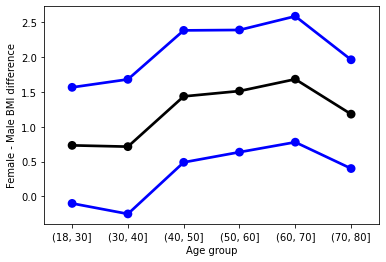

In [155]:
# Plot the mean difference in black and the confidence limits in blue
x = np.arange(pr.shape[0]) # age ranges
pp = sns.pointplot(x=x, y=pr["BMXBMI", "mean_diff", ""], color='black')
sns.pointplot(x=x, y=pr["BMXBMI", "lcb_diff", ""], color='blue')
sns.pointplot(x=x, y=pr["BMXBMI", "ucb_diff", ""], color='blue')
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - Male BMI difference")

## 5. Question 5

> Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [161]:
# First and second systolic blood pressure measuements of same subject: BPXSY1, BPXSY2
m_1 = da["BPXSY1"].dropna().mean()
s_1 = da["BPXSY1"].dropna().std()
n_1 = da["BPXSY1"].dropna().count()
print(m_1, s_1, n_1)
m_2 = da["BPXSY2"].dropna().mean()
s_2 = da["BPXSY2"].dropna().std()
n_2 = da["BPXSY2"].dropna().count()
print(m_2, s_2, n_2)

125.08461396037771 18.480872651654824 5401
124.78301716350497 18.527011720295047 5535


In [191]:
se_mean_1 = s_1 / np.sqrt(n_1)
se_mean_2 = s_2 / np.sqrt(n_2)
(se_mean_1, se_mean_2)

(0.3625953605990392, 0.31773450481927457)

In [192]:
from scipy.stats import norm,t
T_star_95_1 = t(df=n_1-1).ppf(0.975)
T_star_95_2 = t(df=n_2-1).ppf(0.975)
print(T_star_95_1, T_star_95_2)

1.960987922999943 1.960660930319327


In [193]:
lcb_1 = m_1 - T_star_95_1 * se_mean_1
ucb_1 = m_1 + T_star_95_1 * se_mean_1
(lcb_1, ucb_1)

(51.385548236136025, 52.80763848227708)

In [194]:
lcb_2 = m_2 - T_star_95_2 * se_mean_2
ucb_2 = m_2 + T_star_95_2 * se_mean_2
(lcb_2, ucb_2)

(44.636865954449554, 45.882805214076576)

In [195]:
# Difference

In [196]:
m = (da["BPXSY1"]-da["BPXSY2"]).dropna().mean()
s = (da["BPXSY1"]-da["BPXSY2"]).dropna().std()
n = (da["BPXSY1"]-da["BPXSY2"]).dropna().count()
print(m,s,n)

0.6749860309182343 5.046465367896533 5369


In [197]:
se_mean_diff = s / np.sqrt(n)
se_mean_diff

0.06887166703842532

In [198]:
from scipy.stats import norm,t
T_star_95 = t(df=n-1).ppf(0.975)
print(T_star_95)

1.9604060108291357


In [199]:
lcb_diff = m - T_star_95 * se_mean_diff
ucb_diff = m + T_star_95 * se_mean_diff
(lcb_diff, ucb_diff)

(0.5399696008802825, 0.8100024609561861)

## 6. Question 6

> Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [200]:
# Recode SMQ020 from 1/2 to Yes/No into new variable SMQ020x
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})

In [201]:
age_smokers = da.loc[da.SMQ020x=="Yes","RIDAGEYR"].dropna()
age_nonsmokers = da.loc[da.SMQ020x=="No","RIDAGEYR"].dropna()

<AxesSubplot:xlabel='RIDAGEYR', ylabel='Count'>

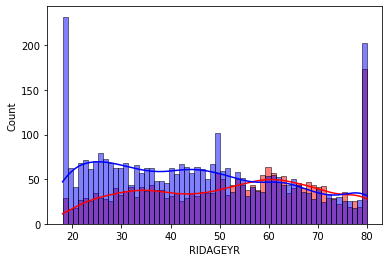

In [202]:
import seaborn as sns
sns.histplot(data=age_smokers,bins=60,kde=True,alpha=0.5,color='red')
sns.histplot(data=age_nonsmokers,bins=60,kde=True,alpha=0.5,color='blue')

In [203]:
m_1 = age_smokers.dropna().mean()
s_1 = age_smokers.dropna().std()
n_1 = age_smokers.dropna().count()
print(m_1, s_1, n_1)
m_2 = age_nonsmokers.dropna().mean()
s_2 = age_nonsmokers.dropna().std()
n_2 = age_nonsmokers.dropna().count()
print(m_2, s_2, n_2)

52.09659335920655 17.461140920034683 2319
45.259835584263065 18.54328622905512 3406


In [204]:
se_mean_1 = s_1 / np.sqrt(n_1)
se_mean_2 = s_2 / np.sqrt(n_2)
(se_mean_1, se_mean_2)

(0.3625953605990392, 0.31773450481927457)

In [205]:
from scipy.stats import norm,t
T_star_95_1 = t(df=n_1-1).ppf(0.975)
T_star_95_2 = t(df=n_2-1).ppf(0.975)
print(T_star_95_1, T_star_95_2)

1.960987922999943 1.960660930319327


In [206]:
lcb_1 = m_1 - T_star_95_1 * se_mean_1
ucb_1 = m_1 + T_star_95_1 * se_mean_1
(lcb_1, ucb_1)

(51.385548236136025, 52.80763848227708)

In [207]:
lcb_2 = m_2 - T_star_95_2 * se_mean_2
ucb_2 = m_2 + T_star_95_2 * se_mean_2
(lcb_2, ucb_2)

(44.636865954449554, 45.882805214076576)